<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/auto-pvr/blob/main/autoProverbious.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def getSpaces(text):
    spaces = []
    for i in range(len(text)):
        if text[i] == ' ':
            spaces.append(i)
    return spaces


def getBiggestSmallest(arraio,n) :
  for index,curr  in enumerate(arraio):
    if curr > n:
      return arraio[index-1]
  return 9000

def divitedText(text, SizeLine):
  spaces = np.array(getSpaces(text))
  volta = 0
  while 1:
    #print(spaces)
    volta+=1
    local = getBiggestSmallest(spaces,SizeLine*volta)
    if local == 9000:
      break
    text = text[:local] + '\n' + text[local+1:]
  return text , volta

def tranformar():
  if(inp == '+1') :
    extra = True
    versicleAdress = f'{today}:({versicleIndex+1},{versicleIndex+2})'
    finalResult = (
  f"""{dailyVersicle} {next}
_
prv {versicleAdress}""")
  elif(inp == '-1'):
    extra=True
    versicleAdress = f'{today}:({versicleIndex},{versicleIndex+1})'
    finalResult = (
  f"""{before} {dailyVersicle}
_
prv {versicleAdress}""")

  return finalResult

In [24]:
import json
import tweepy
from random import randrange
from datetime import date
import requests

today = date.today().day
mounth = date.today().month
#today = 1
bible = json.loads(requests.get('https://raw.githubusercontent.com/thiagobodruk/bible/master/json/pt_nvi.json').text.encode().decode('utf-8-sig'))
for book  in bible :
  if (book["abbrev"] == "pv"):
    proverbios = book
    break

cap = proverbios['chapters']

cd = cap[today-1]
limit = len(cd)
versicleIndex = randrange(0,limit)

dailyVersicle = cd[versicleIndex]
versicleAdress = f'({today}:{versicleIndex+1})'

before,next = cd[versicleIndex-1],cd[versicleIndex + 1]

finalResult = (
f"""{dailyVersicle}
_
prv {versicleAdress}""")

print(finalResult)


extra=False

Não abandone o seu amigo nem o amigo de seu pai; quando for atingido pela adversidade não vá para a casa de seu irmão; melhor é o vizinho próximo do que o irmão distante.
_
prv (27:10)


In [26]:
print(len(finalResult))

184


In [14]:
mounth = date.today().month

In [6]:
inp='+1'
finalResult = tranformar()
extra = True
print(finalResult)

O crisol é para a prata e o forno é para o ouro, mas o que prova o homem são os elogios que recebe. Ainda que você moa o insensato, como trigo no pilão, a insensatez não se afastará dele.
_
prv 27:(21,22)


In [ ]:
inp='-1'
finalResult = tranformar()
extra = True
print(finalResult)

In [7]:
inp=' '
extra = False #caso em que era melhor com menos contexto

dailyVersicle = cd[versicleIndex]
versicleAdress = f'({today}:{versicleIndex+1})'


finalResult = (
f"""{dailyVersicle}
_
prv {versicleAdress}""")

print(finalResult)

O crisol é para a prata e o forno é para o ouro, mas o que prova o homem são os elogios que recebe.
_
prv (27:21)


['c92a372.jpg', '7b11b76.jpg', '809b86f.jpg', '491ba8f.png', '8c1dd93.jpg', '4df0622.jpg', 'a12935b.jpg', '1574532.jpg', '62af6d8.jpg', 'ee6f239.jpg', 'ccba2ec.jpg', 'b44ef3b.jpg', 'f3de874.jpg', '389165f.png', '373c710.jpg', 'cfebce7.jpg', '009nQzcjAJU4V8ZG-VokDW-tu12NZyi3LsMv3kf_uFU.webp', 'IMG_20220522_181025552.jpg', 'IMG_20220508_164848671.jpg', 'IMG_20220223_184451913.jpg', 'IMG_20220220_182219229.jpg', '20211206_181010.jpg', 'IMG_20211128_184255277.jpg', 'IMG_20211108_053101140.dng', 'IMG-20210330-WA0350.jpg', '98e2dfd.jpg', 'f2b4dc2-1.jpg', 'IMG_20200215_182134076_BURST000_COVER_TOP.jpg', 'IMG_20180812_155354.jpg', 'IMG_20180604_212446.jpg', '20220315_170609.jpg', 'IMG_20211023_181010633.jpg', 'PSX_20210926_194524.jpg']
26
(3000, 4000)


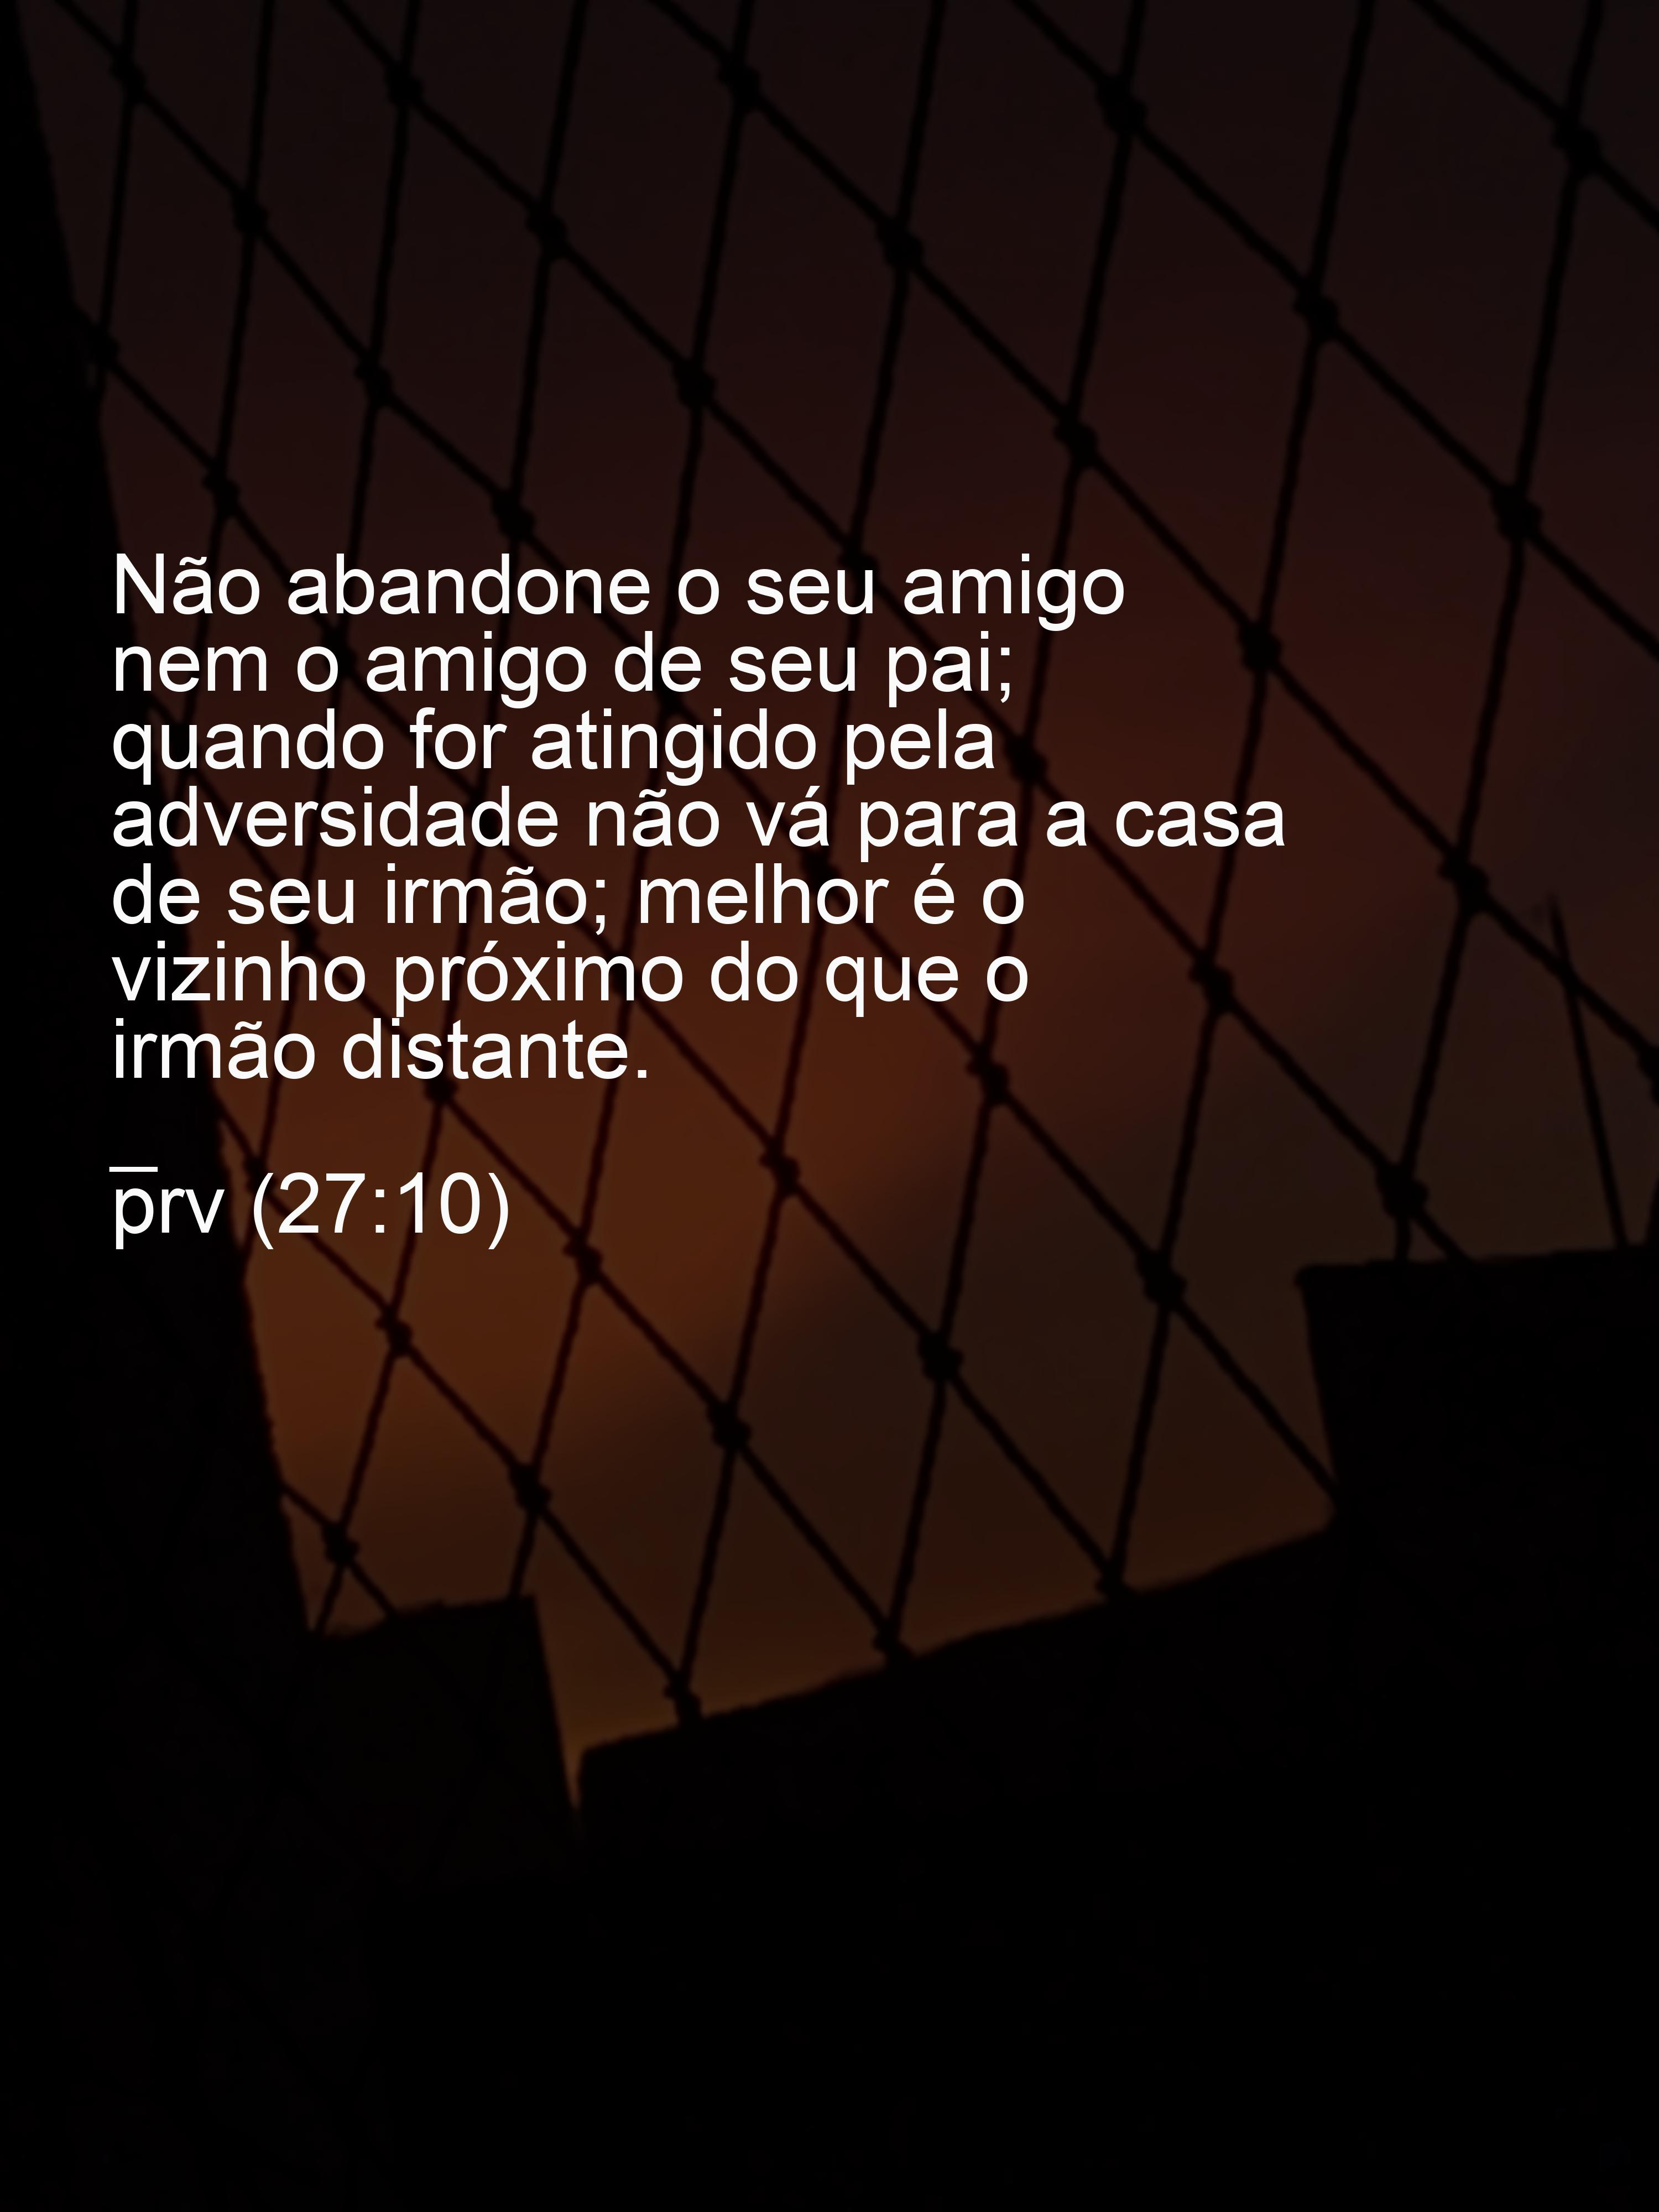

In [28]:
import numpy as np
import IPython.display as d
import os
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
import math
from random import randrange, uniform

from PIL.ImageFilter import (
   BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN
)

text= finalResult
patternPath = '/content/drive/MyDrive/fotos maneras'
imgNamePath = os.listdir(patternPath)
print(imgNamePath)
imgPath = patternPath + '/' + imgNamePath[randrange(0,len(imgNamePath))]
img = Image.open(imgPath)
img = img.filter(BLUR).filter(BLUR).filter(BLUR).filter(BLUR)
img = ImageEnhance.Brightness(img).enhance(0.3)
[width, height] = img.size
cantofact = 15
sizeOfCanto = int(width/cantofact)
diminuit = 20 if (extra or (len(finalResult) > 150)) else 15
fontSize=int(width/diminuit)
[initialWidth,initialHeight] = map(lambda x: int(x/cantofact),[width,height])
limitLine = int(1.3*diminuit)
print(limitLine)
convertedText , numberOfLines = divitedText(text,limitLine)
print(img.size)

if (height > width):
  initialHeight =int((initialHeight/2)+(fontSize*numberOfLines*0.8))

idr = ImageDraw.Draw(img)

font = ImageFont.truetype('/content/drive/MyDrive/fontes/arial.ttf' ,int(fontSize))

idr.text((initialWidth, initialHeight), convertedText, fill=(250, 250, 250), font=font)

dirPath = f'/content/drive/MyDrive/mainPvrDir/pvrMounth{mounth}'

exist = (os.path.isdir(dirPath))

if not exist:
  os.mkdir(dirPath)

newPath = f'{dirPath}/pvr{today}.jpg'

img.save(newPath)
d.Image(newPath)

In [ ]:
auth = tweepy.OAuthHandler(keys['chave1'],keys['chave2'])
auth.set_access_token(keys['chave3'],keys['chave4'])
api = tweepy.API(auth)

twet = api.update_with_media(newPath)
#api.update_status('https://github.com/luisArthurRodriguesDaSilva/auto-pvr',twet.id)

In [ ]:
auth = tweepy.OAuthHandler(keys['chave1'],keys['chave2'])
auth.set_access_token(keys['chave3'],keys['chave4'])
api = tweepy.API(auth)

twet = api.update_status('teste')
api.update_status('https://github.com/luisArthurRodriguesDaSilva/auto-pvr',twet.id)